# UN Human Development Index

In [249]:
# importing libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pandas:
Provides tools for data manipulation and analysis. It allows handling of structured data (e.g., DataFrames) for tasks such as cleaning, reshaping, and aggregating data.

numpy:
Offers support for numerical computations. It provides fast operations on arrays and matrices, including mathematical, statistical, and logical functions.

seaborn:
A data visualization library built on Matplotlib, offering advanced statistical plots with better aesthetics. It simplifies the creation of visualizations such as heatmaps, box plots, and scatter plots.

matplotlib.pyplot:
A core library for creating static, interactive, and animated plots in Python. It serves as the foundation for many other visualization libraries, enabling customization and a wide range of plotting options.

In [250]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\Human Development Index.csv", encoding="latin1")
df

,HDI Rank,Country,1990,Unnamed: 3,2000,Unnamed: 5,2010,Unnamed: 7,2011,Unnamed: 9,2012,Unnamed: 11,2013,Unnamed: 13,2014
0,1,Norway,0.849,NaN,0.917,NaN,0.940,NaN,0.941,NaN,0.942,NaN,0.942,NaN,0.944
1,2,Australia,0.865,NaN,0.898,NaN,0.927,NaN,0.930,NaN,0.932,NaN,0.933,NaN,0.935
2,3,Switzerland,0.831,NaN,0.888,NaN,0.924,NaN,0.925,NaN,0.927,NaN,0.928,NaN,0.930
3,4,Denmark,0.799,NaN,0.862,NaN,0.908,NaN,0.920,NaN,0.921,NaN,0.923,NaN,0.923
4,5,Netherlands,0.829,NaN,0.877,NaN,0.909,NaN,0.919,NaN,0.920,NaN,0.920,NaN,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,184,Burundi,0.295,NaN,0.301,NaN,0.390,NaN,0.392,NaN,0.395,NaN,0.397,NaN,0.400
184,185,Chad,..,NaN,0.332,NaN,0.371,NaN,0.382,NaN,0.386,NaN,0.388,NaN,0.392
185,186,Eritrea,..,NaN,..,NaN,0.381,NaN,0.386,NaN,0.390,NaN,0.390,NaN,0.391
186,187,Central African Republic,0.314,NaN,0.310,NaN,0.362,NaN,0.368,NaN,0.373,NaN,0.348,NaN,0.350


In [251]:
 # Remove Columns with All Empty (or NaN) Values
df = df.dropna(axis=1, how='all')
df.head()

,HDI Rank,Country,1990,2000,2010,2011,2012,2013,2014
0,1,Norway,0.849,0.917,0.940,0.941,0.942,0.942,0.944
1,2,Australia,0.865,0.898,0.927,0.930,0.932,0.933,0.935
2,3,Switzerland,0.831,0.888,0.924,0.925,0.927,0.928,0.930
3,4,Denmark,0.799,0.862,0.908,0.920,0.921,0.923,0.923
4,5,Netherlands,0.829,0.877,0.909,0.919,0.920,0.920,0.922


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI Rank  188 non-null    int64  
 1   Country   188 non-null    object 
 2   1990      188 non-null    object 
 3   2000      188 non-null    object 
 4   2010      188 non-null    float64
 5   2011      188 non-null    float64
 6   2012      188 non-null    float64
 7   2013      188 non-null    float64
 8   2014      188 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 13.3+ KB


This output describes the structure of a Pandas DataFrame with 188 rows and 9 columns. Key details include:

- **Columns:** The DataFrame contains columns such as 'HDI Rank', 'Country', and years (1990, 2000, 2010–2014).
- **Non-Null Count:** All columns have 188 non-null entries, indicating no missing values in the dataset.
- **Data Types:** The data types include `int64` for 'HDI Rank', `object` (likely strings) for 'Country' and early years (1990, 2000), and `float64` for later years (2010–2014).
- **Memory Usage:** The DataFrame occupies 13.3 KB in memory.

This summary indicates that the dataset is mostly clean, with consistent formatting for later year columns. However, '1990' and '2000' columns might require further processing if they represent numeric data stored as strings.

In [253]:
# Checking for missing values
df.isna().sum()

HDI Rank    0
Country     0
1990        0
2000        0
2010        0
2011        0
2012        0
2013        0
2014        0
dtype: int64

There are no missing values in this dataset.


In [254]:
# Replace '..' with NaN 
df.replace('..', np.nan, inplace=True)

df['Country'] = df['Country'].astype(str)

# Convert all numeric columns to numeric, to handle possible non-numeric entries
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Fill missing values in the numeric columns with the mean of each row
df.iloc[:, 2:] = df.iloc[:, 2:].apply(lambda row: row.fillna(row.mean()), axis=1)

# Print the updated DataFrame
print(df)

     HDI Rank                   Country      1990    2000   2010   2011  \
0           1                    Norway     0.849   0.917  0.940  0.941   
1           2                 Australia     0.865   0.898  0.927  0.930   
2           3               Switzerland     0.831   0.888  0.924  0.925   
3           4                   Denmark     0.799   0.862  0.908  0.920   
4           5               Netherlands     0.829   0.877  0.909  0.919   
..        ...                       ...       ...     ...    ...    ...   
183       184                   Burundi     0.295   0.301  0.390  0.392   
184       185                      Chad  0.375167   0.332  0.371  0.382   
185       186                   Eritrea    0.3876  0.3876  0.381  0.386   
186       187  Central African Republic     0.314    0.31  0.362  0.368   
187       188                     Niger     0.214   0.257  0.326  0.333   

      2012   2013   2014  
0    0.942  0.942  0.944  
1    0.932  0.933  0.935  
2    0.927  0.928 

C:\Users\Admin\AppData\Local\Temp\ipykernel_25828\894553760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('..', np.nan, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25828\894553760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25828\894553760.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future b


The code cleans a DataFrame by replacing .. with NaN, converting the 'Country' column to strings, handling non-numeric entries in numeric columns by converting them to NaN, and filling missing numeric values with the row-wise mean. It ensures consistent data formatting and handles missing values before printing the updated DataFrame.

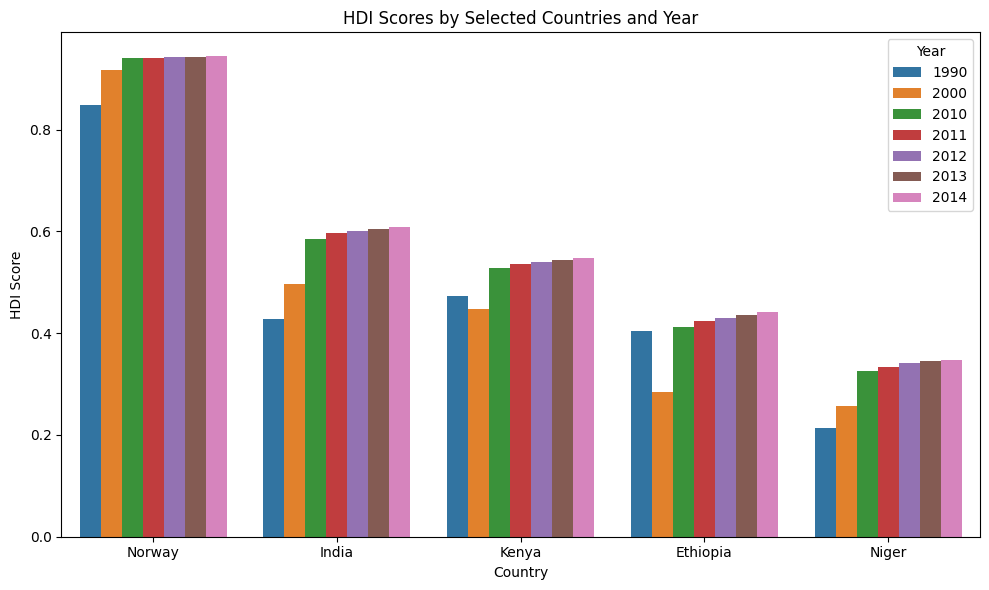

In [255]:
# List of selected countries
selected_countries = ['Norway', 'India', 'Ethiopia', 'Kenya', 'Niger']

# Filter the DataFrame for the selected countries
filtered_df = df[df['Country'].isin(selected_countries)]

# Melt the filtered DataFrame into long format for easier plotting
filtered_df_long = filtered_df.melt(id_vars=['Country'], value_vars=years, var_name='Year', value_name='HDI Score')

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='HDI Score', hue='Year', data=filtered_df_long)
plt.title('HDI Scores by Selected Countries and Year')
plt.xlabel('Country')
plt.ylabel('HDI Score')
plt.tight_layout()
plt.show()


This graph shows the Human Development Index (HDI) scores for five countries (Norway, India, Kenya, Ethiopia, and Niger) tracked across multiple years from 1990 to 2014. The HDI is a measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable, and having a decent standard of living. Scores range from 0 to 1, with higher scores indicating better development.

Key observations:
1. Norway consistently has the highest HDI (around 0.85-0.9), typical of developed nations
2. There's a clear development gap between Norway and the other four countries
3. All countries show gradual improvement over the 24-year period
4. India shows significant progress, rising from about 0.4 to 0.6
5. Niger, despite improvement, remains at the lowest HDI (0.2-0.35)
6. The African nations (Kenya, Ethiopia, Niger) show steady but slower progress
7. The development gap between the highest (Norway) and lowest (Niger) remains large

The pattern suggests:
- Consistent global development over this period
- Persistent inequality between developed and developing nations
- Faster development in some countries (like India) compared to others
- A need for continued focus on development in African nations

Distribution of Kenya\'s HDI Scores Over the Years

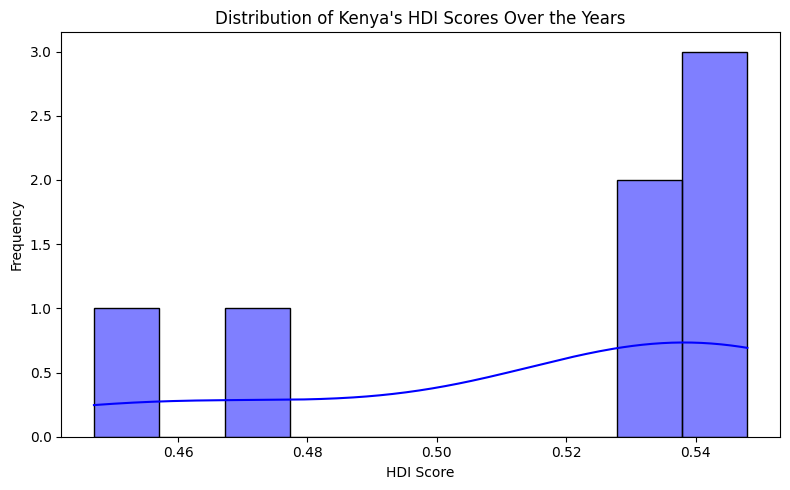

In [256]:
# Filter the dataset for Kenya
kenya_data = df[df['Country'] == 'Kenya']

# Extract HDI scores for Kenya across the years
kenya_hdi = kenya_data[years].values.flatten()  # Flatten to get a 1D array

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(kenya_hdi, kde=True, bins=10, color='blue')
plt.title('Distribution of Kenya\'s HDI Scores Over the Years')
plt.xlabel('HDI Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


This code creates a clean histogram that visualizes the distribution of Kenya's HDI scores across the specified years. The KDE line offers insight into the smooth distribution of HDI values over time.

This histogram shows the distribution of Kenya's HDI (Human Development Index) scores over time, with a kernel density estimation curve overlaid.

Key observations:
1. The HDI scores range from approximately 0.46 to 0.54
2. There appears to be three distinct clusters:
   - Lower scores around 0.46
   - Middle scores around 0.48
   - Higher scores clustered around 0.54
3. The highest frequency is at the 0.54 mark, suggesting recent years have higher HDI scores
4. The smooth curve shows a skewed distribution towards higher scores
5. This pattern suggests Kenya's development has not been linear but has shown more rapid improvement in recent periods

This visualization complements the previous graph by showing not just the trend but the actual distribution of Kenya's HDI scores, highlighting that the country has spent more time at higher HDI levels (around 0.54) than at lower levels, indicating sustained development progress in recent years.

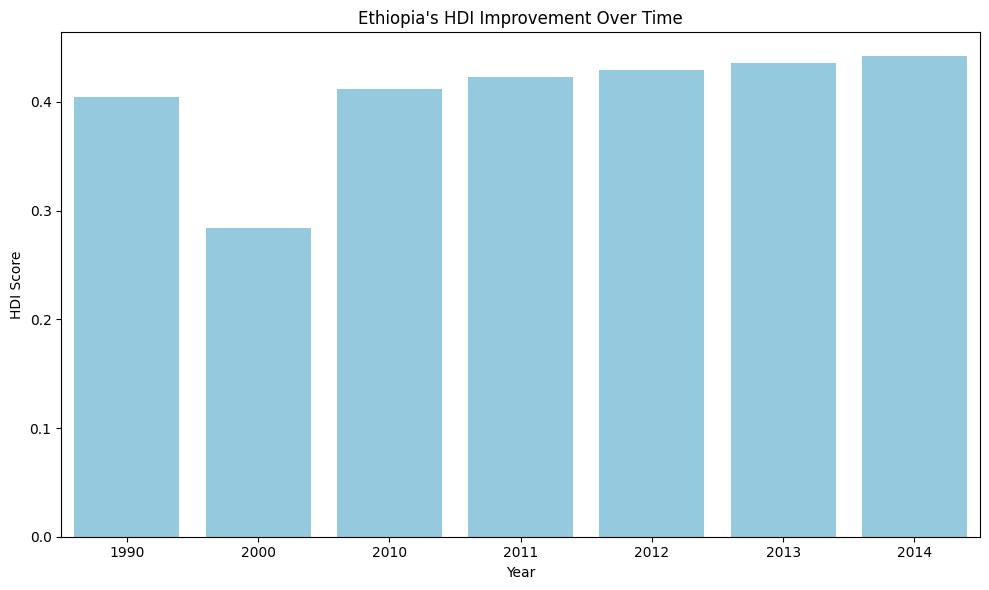

In [257]:
# Filter the dataset for Ethiopia
ethiopia_data = df[df['Country'] == 'Ethiopia']
ethiopia_hdi_long = ethiopia_data.melt(id_vars=['Country'], value_vars=years, var_name='Year', value_name='HDI Score')

# Plot Ethiopia's HDI Improvement Over Time
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='HDI Score', data=ethiopia_hdi_long, color='skyblue')
plt.title('Ethiopia\'s HDI Improvement Over Time')
plt.xlabel('Year')
plt.ylabel('HDI Score')
plt.tight_layout()
plt.show()


This bar chart shows Ethiopia's HDI (Human Development Index) scores from 1990 to 2014, revealing several interesting patterns:

1. Overall Progress:
- Started at 0.4 in 1990
- Experienced a significant drop to 0.28 in 2000
- Recovered and improved steadily from 2010 onwards
- Reached approximately 0.44 by 2014

2. Key Periods:
- 1990-2000: Major decline, possibly due to political instability or economic challenges
- 2000-2010: Strong recovery, returning to near-1990 levels
- 2010-2014: Consistent year-over-year improvements, though smaller increments

3. Recent Trends:
- The progress from 2010-2014 shows steady but gradual improvement
- Each year shows a small but positive increase
- The slope of improvement is relatively consistent in recent years

This visualization suggests that while Ethiopia faced significant challenges in the 1990s, it has shown resilient recovery and consistent development progress in the 21st century, particularly in the most recent decade.